### Import necessary libraries

In [12]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter


### Merge data from each month into one CSV

In [2]:
path= r'D:\Data-Science-Tasks\SalesAnalysis\Sales_Data'
files= [file for file in os.listdir(path)]

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv(r"D:\Data-Science-Tasks\SalesAnalysis\Sales_Data\all_data.csv", index=False)

### Read all data

In [3]:
all_data= pd.read_csv(r"D:\Data-Science-Tasks\SalesAnalysis\Sales_Data\all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data

#### Drop rows of NAN

In [4]:
all_data= all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Get rid of text in order date column

In [5]:
all_data= all_data[all_data['Order Date'].str[0:2]!='Or']

#### Make columns correct type

In [6]:
all_data['Quantity Ordered']= pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']= pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns

#### Add month column

In [8]:
all_data['month']= all_data['Order Date'].str[0:2]
all_data['month']= pd.to_numeric(all_data['month'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add sales column

In [17]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

#### Add city column

In [31]:
#address= all_data['Purchase Address'].str.split(',')

In [46]:
#city= [ city[1]+ ' ' + city[2].split(' ')[1] for city in  address]

In [49]:
#all_data['City']= city

In [59]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1] 

all_data['City']= all_data['Purchase Address'].apply(lambda x: f'{get_city(x)} {get_state(x)}')

#### Add hour column

In [78]:
all_data['Order Date']= pd.to_datetime(all_data['Order Date'])

In [79]:
all_data['Hour']= all_data['Order Date'].dt.hour

In [80]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


### Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month? 

In [14]:
result= all_data.groupby(['month']).sum()

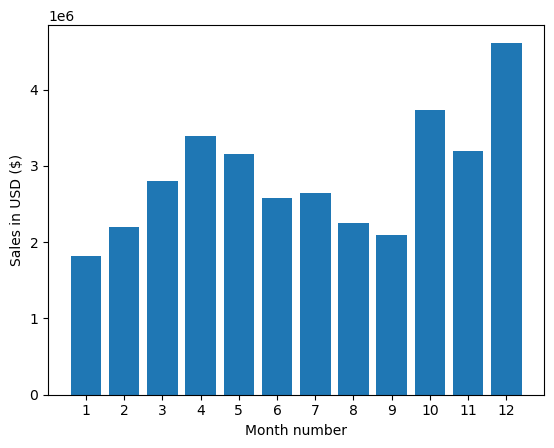

In [16]:
months = range(1,13)

plt.bar(months,result['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### Question 2: What city had the highest number of sales? 

In [65]:
results= all_data.groupby(['City']).sum()

In [66]:
results

,Quantity Ordered,Price Each,month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


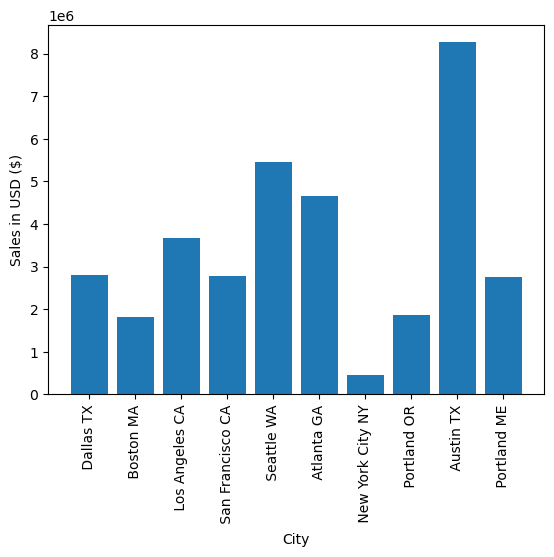

In [71]:
#cities= all_data['City'].unique()

#plt.bar(cities,result['Sales'])
#plt.xticks(cities, rotation= 'vertical')
#plt.ylabel('Sales in USD ($)')
#plt.xlabel('City')
#plt.show()

because order matter and cities in unique methods does not have the same order

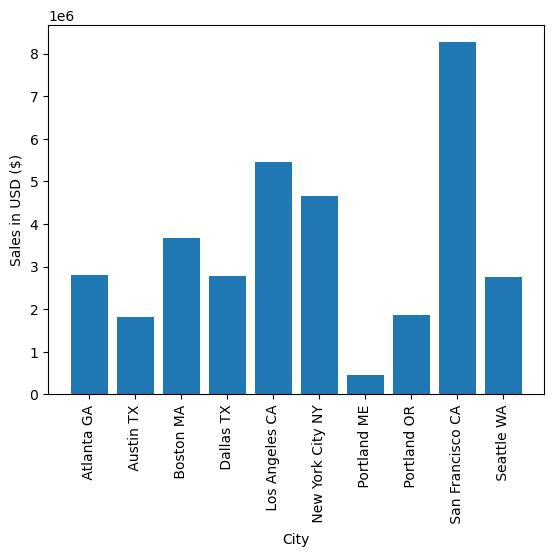

In [74]:
cities= [city for city, df in all_data.groupby(['City'])]

plt.bar(cities,result['Sales'])
plt.xticks(cities, rotation= 'vertical')
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

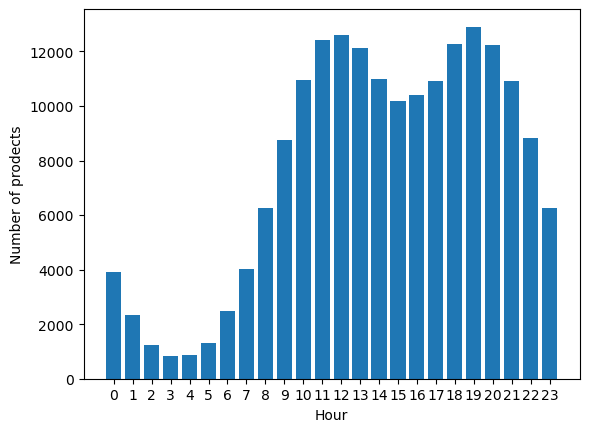

In [82]:
hours= [hour for hour, df in all_data.groupby(['Hour'])]

plt.bar(hours, all_data.groupby(['Hour']).count()['Product'])
plt.xticks(hours)
plt.ylabel('Number of prodects')
plt.xlabel('Hour')
plt.show()

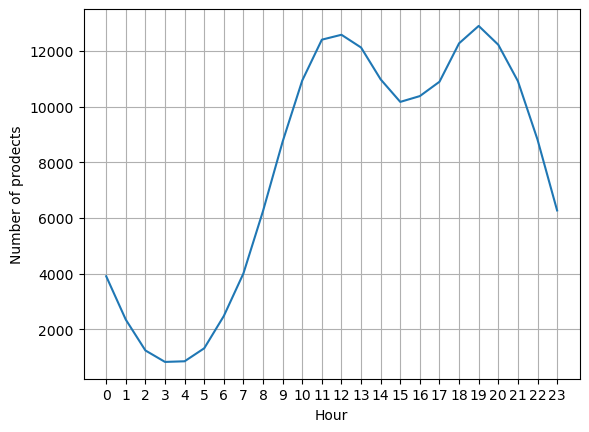

In [83]:
hours= [hour for hour, df in all_data.groupby(['Hour'])]

plt.plot(hours, all_data.groupby(['Hour']).count()['Product'])
plt.xticks(hours)
plt.grid()
plt.ylabel('Number of prodects')
plt.xlabel('Hour')
plt.show()

#### Question 4: What products are most often sold together?

In [132]:
df= all_data[all_data['Order ID'].duplicated(keep=False)]

In [134]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\ALKODS\AppData\Local\Temp\ipykernel_12316\2345761670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [141]:
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

In [143]:
df2

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [147]:
df3 = pd.DataFrame()

In [154]:
l=['Grouped,we','Grouped,qq','Grouped,ww','Grouped,rr','Grouped,rr','Grouped,rr']

In [155]:
df3['Grouped']= l

In [156]:
count = Counter()

for row in df3['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('Grouped', 'rr') 3
('Grouped', 'we') 1
('Grouped', 'qq') 1
('Grouped', 'ww') 1


In [146]:
count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most? Why do you think it sold the most?

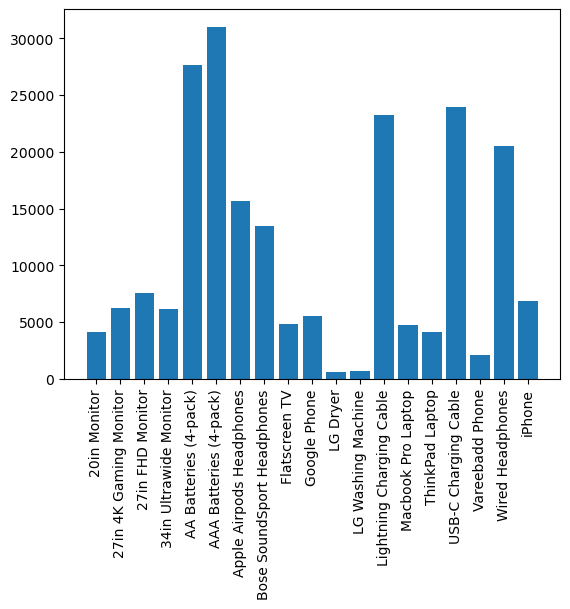

In [157]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

Products = [Product for Product, df in product_group]
plt.bar(Products, quantity_ordered)
plt.xticks(Products, rotation='vertical')
plt.show()